In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import norm
import statsmodels.api as sm
from scipy.stats import jarque_bera
import data_handling as dh

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1. 正規分布の過程はダメじゃない？
2. Simulation Pathはどれくらい必要か（枇々木先生の論文参照）
3. F strategyで固定の賃金が入っていないため、富が過小になっている

In [32]:
logr_df = dh.get_log_r_df()

data period: start=2014-09-01, end=2025-08-01
asset names: ['Wage', 'Corp. Bond', 'Stock', 'Crypto']


In [33]:
asset = "Wage"

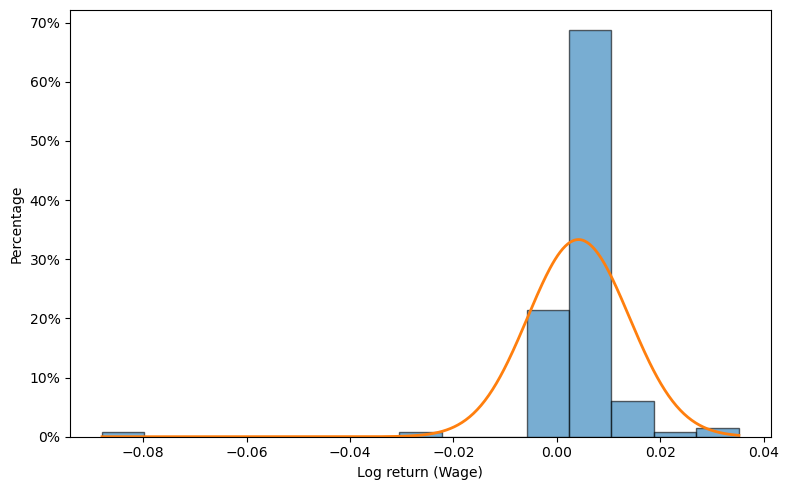

In [34]:
# データ
x = logr_df[asset].dropna()

# 平均・標準偏差（スカラー）
mu = x.mean(axis=0)
sigma = x.std(axis=0)

# ヒストグラム（割合）
weights = np.ones(len(x)) / len(x)

fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(
    x,
    bins=15,
    weights=weights,
    alpha=0.6,
    edgecolor="black",
)

# 正規分布を重ね描き（% に合わせる）
xx = np.linspace(x.min(), x.max(), 500)
pdf = norm.pdf(xx, mu, sigma)

# bin幅補正（←重要）
bin_width = (x.max() - x.min()) / 15
ax.plot(xx, pdf * bin_width, linewidth=2)

# y軸を %
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_ylabel("Percentage")
ax.set_xlabel(f"Log return ({asset})")

plt.tight_layout()
plt.show()


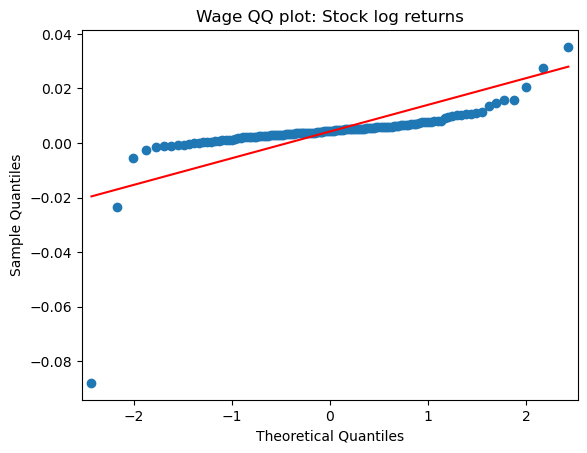

In [35]:
sm.qqplot(x, line="s")
plt.title(f"{asset} QQ plot: Stock log returns")
plt.show()

In [36]:
jb_stat, jb_p = jarque_bera(x)

print(f"Jarque–Bera statistic = {jb_stat:.4f}")
print(f"p-value = {jb_p:.4e}")


Jarque–Bera statistic = 19523.8370
p-value = 0.0000e+00


In [49]:
logr_df.mean(axis=0)

Wage          0.004193
Corp. Bond    0.002272
Stock         0.007894
Crypto        0.043006
dtype: float64

In [51]:
logr_t = np.array_split(logr_df.to_numpy(), 1)
mu = logr_t[0].mean(axis=0)
mu

array([0.00419337, 0.00227209, 0.00789367, 0.04300608])

In [52]:
mu[0] = 0.0
mu

array([0.        , 0.00227209, 0.00789367, 0.04300608])